# Jonathan's Project Notes


## Bollinger Bands

In [111]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


In [112]:
load_dotenv()


True

In [113]:
alpaca_api_key = os.getenv("APCA_API_KEY_ID")
alpaca_secret_key = os.getenv("APCA_API_SECRET_KEY")


In [114]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)


In [115]:
start_date = pd.Timestamp('2020-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-06-20', tz='America/New_York').isoformat()


In [116]:
ticker = ['JPM']

In [117]:
timeframe = '15Min'

In [118]:
df_ohlc = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date
).df

In [119]:
df_ohlc = df_ohlc['JPM']
df_ohlc.head()

,open,high,low,close,volume
time,,,,,
2020-01-02 00:00:00-05:00,139.79,141.10,139.265,141.09,8484783
2020-01-03 00:00:00-05:00,137.50,139.23,137.080,138.28,8191470
2020-01-06 00:00:00-05:00,136.56,138.27,136.500,138.21,6884814
2020-01-07 00:00:00-05:00,137.28,137.86,135.820,135.87,8925842
2020-01-08 00:00:00-05:00,135.78,137.58,135.600,136.97,7572412


In [120]:
# Window size
bollinger_band_window = 5
num_standard_deviation = 2

# Calculate mean and standard deviation
df_ohlc['bollinger_band_middle'] = df_ohlc['close'].rolling(window=bollinger_band_window).mean()
df_ohlc['bollinger_band_std'] = df_ohlc['close'].rolling(window=bollinger_band_window).std()

# Calculate upper bollinger band and lower bollinger band
df_ohlc['bollinger_band_upper'] = df_ohlc['bollinger_band_middle'] + (df_ohlc['bollinger_band_std'] * num_standard_deviation)
df_ohlc['bollinger_band_lower'] = df_ohlc['bollinger_band_middle'] - (df_ohlc['bollinger_band_std'] * num_standard_deviation)

df_ohlc.head

<bound method NDFrame.head of                              open    high      low    close    volume  \
time                                                                    
2020-01-02 00:00:00-05:00  139.79  141.10  139.265  141.090   8484783   
2020-01-03 00:00:00-05:00  137.50  139.23  137.080  138.280   8191470   
2020-01-06 00:00:00-05:00  136.56  138.27  136.500  138.210   6884814   
2020-01-07 00:00:00-05:00  137.28  137.86  135.820  135.870   8925842   
2020-01-08 00:00:00-05:00  135.78  137.58  135.600  136.970   7572412   
...                           ...     ...      ...      ...       ...   
2020-06-15 00:00:00-04:00   96.42  101.43   95.870  101.320  38807974   
2020-06-16 00:00:00-04:00  105.37  105.68   99.310  102.120  39954813   
2020-06-17 00:00:00-04:00  102.53  102.54   99.210   99.450  27161051   
2020-06-18 00:00:00-04:00   98.67  100.52   98.130   98.990  30146062   
2020-06-19 00:00:00-04:00  100.53  100.60   96.730   97.935  56050304   

                    

In [121]:
#df_ohlc.drop_duplicates(subset='bollinger_band_middle', keep=False, inplace=True)


<AxesSubplot:xlabel='time'>

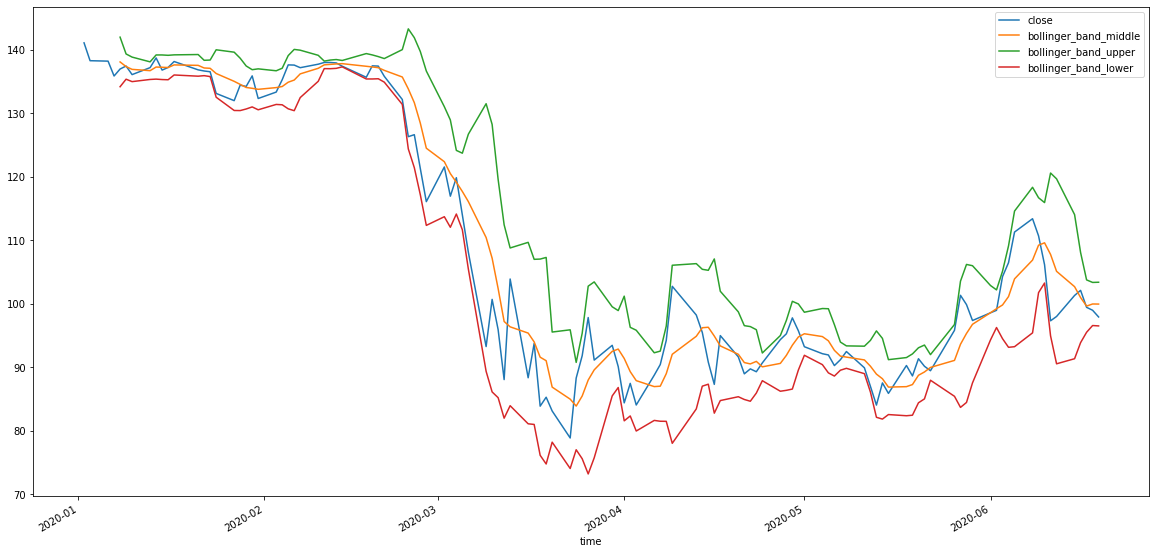

In [122]:
df_ohlc[['close', 'bollinger_band_middle', 'bollinger_band_upper', 'bollinger_band_lower']].plot(figsize=(20,10))